In [2]:
import numpy as np 
S0 = 10
B0 = 10

In [3]:
S1 = np.array((20,5))
B1 = np.array((11,11))
M0 = np.array((S0,B0))
M0

array([10, 10])

In [4]:
M1 = np.array((S1,B1)).T
M1

array([[20, 11],
       [ 5, 11]])

In [5]:
K = 14.5
C1 = np.maximum(S1-K, 0)
C1

array([5.5, 0. ])

In [6]:
phi = np.linalg.solve(M1,C1)
phi

array([ 0.36666667, -0.16666667])

In [7]:
np.allclose(C1, np.dot(M1, phi))

True

In [8]:
C0 = np.dot(M0, phi)
C0

2.0

In [9]:
def u(x):
    return np.sqrt(x)

In [10]:
phi_A = np.array((0.75, 0.25))
phi_D = np.array((0.25, 0.75))
np.dot(M0, phi_A) == np.dot(M0, phi_D)

True

In [11]:
A1 = np.dot(M1, phi_A)
A1

array([17.75,  6.5 ])

In [12]:
D1 = np.dot(M1, phi_D)
D1

array([13.25,  9.5 ])

In [13]:
P = np.array((0.5,0.5))

In [14]:
def EUT(x):
    return np.dot(P,u(x))

In [15]:
EUT(A1)

3.381292321692286

In [16]:
EUT(D1)

3.3611309730623735

In [17]:
from scipy.optimize import minimize
w=10
cons = {'type':'eq', 'fun': lambda phi:np.dot(M0, phi) -w}

In [18]:
def EUT_(phi):
    x = np.dot(M1,phi)
    return EUT(x)

In [19]:
opt = minimize(lambda phi: -EUT_(phi), 
               x0=phi_A, constraints=cons)
opt

     fun: -3.385015999493397
     jac: array([-1.69249132, -1.69253424])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.61122474, 0.38877526])

In [20]:
EUT_(opt['x'])

3.385015999493397

## Mean-Variance Portfolio Theory

In [21]:
rS = S1 / S0 - 1
rS

array([ 1. , -0.5])

In [22]:
rB = B1 / B0 - 1
rB

array([0.1, 0.1])

In [23]:
def mu(rX):
    return np.dot(P, rX)
mu(rS)

0.25

In [24]:
mu(rB)

0.10000000000000009

In [25]:
rM = M1 / M0 - 1
rM

array([[ 1. ,  0.1],
       [-0.5,  0.1]])

In [26]:
mu(rM)

array([0.25, 0.1 ])

In [27]:
def var(rX):
    return ((rX - mu(rX))**2).mean()
var(rS)

0.5625

In [28]:
var(rB)

0.0

In [29]:
def sigma(rX):
    return np.sqrt(var(rX))
sigma(rS)

0.75

In [30]:
sigma(rB)

0.0

In [31]:
np.cov(rM.T, aweights=P, ddof=0)

array([[0.5625, 0.    ],
       [0.    , 0.    ]])

In [32]:
phi = np.array((0.5, 0.5))
def mu_phi(phi):
    return np.dot(phi, mu(rM))

In [33]:
mu_phi(phi)

0.17500000000000004

In [34]:
def var_phi(phi):
    cv = np.cov(rM.T, aweights=P,ddof=0)
    return np.dot(phi, np.dot(cv, phi))

In [35]:
var_phi(phi)

0.140625

In [36]:
def sigma_phi(phi):
    return var_phi(phi) ** 0.5
sigma_phi(phi)

0.375

In [37]:
from pylab import plt, mpl 
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [38]:
phi_mcs = np.random.random((2,200))
phi_mcs = (phi_mcs / phi_mcs.sum(axis=0)).T
mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])

Text(0, 0.5, 'expected return')

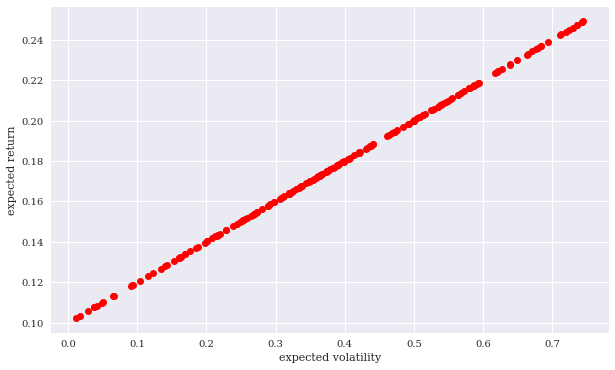

In [39]:
plt.figure(figsize=(10,6))
plt.plot(mcs[:,0], mcs[:,1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return')

In [40]:
P = np.ones(3) /3
P

array([0.33333333, 0.33333333, 0.33333333])

In [41]:
S1 = np.array((20,10,5))

In [42]:
T0 = 10
T1 = np.array((1,12,13))
M0 = np.array((S0, T0))
M0

array([10, 10])

In [43]:
M1 = np.array((S1,T1)).T
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [44]:
rM = M1 / M0 - 1
rM

array([[ 1. , -0.9],
       [ 0. ,  0.2],
       [-0.5,  0.3]])

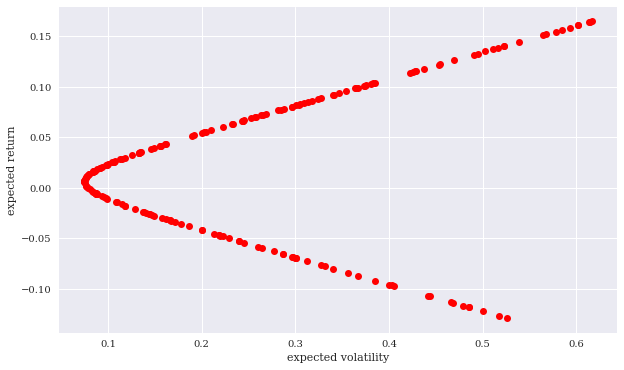

In [45]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])
plt.figure(figsize=(10,6))
plt.plot(mcs[:,0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return');

In [46]:
cons = {'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1}
bnds = ((0,1), (0,1))
min_var = minimize(sigma_phi, (0.5,0.5), constraints=cons, bounds=bnds)
min_var


     fun: 0.07481322946905193
     jac: array([0.07426564, 0.07528945])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.46511697, 0.53488303])

In [47]:
def sharpe(phi):
    return mu_phi(phi) / sigma_phi(phi)

In [48]:
max_sharpe = minimize(lambda phi: -sharpe(phi), (0.5,0.5), constraints=cons, bounds=bnds)
max_sharpe

     fun: -0.2721654099067235
     jac: array([ 0.00012052, -0.00024173])
 message: 'Optimization terminated successfully'
    nfev: 29
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.66731113, 0.33268887])

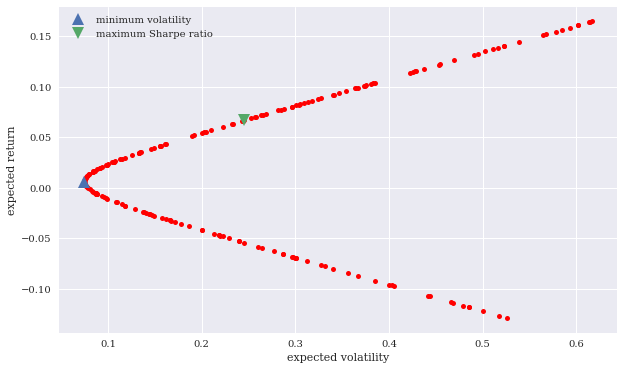

In [49]:
plt.figure(figsize=(10,6))
plt.plot(mcs[:,0], mcs[:,1], 'ro', ms=5)
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
'^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [50]:
cons = [{'type':'eq','fun':lambda phi: np.sum(phi) - 1}, 
        {'type':'eq', 'fun': lambda phi: mu_phi(phi) - target}]

In [51]:
bnds = ((0,1),(0,1))
targets = np.linspace(mu_phi(min_var['x']), 0.16)
frontier = []
for target in targets:
    phi_eff = minimize(sigma_phi, (0.5, 0.5), constraints=cons, bounds=bnds)['x']
    frontier.append((sigma_phi(phi_eff), mu_phi(phi_eff)))
frontier = np.array(frontier)

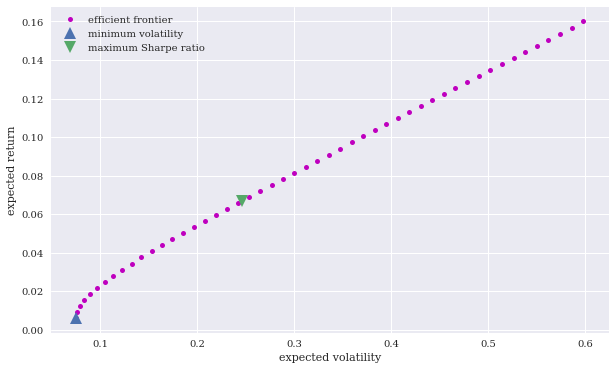

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'mo', ms=5,
label='efficient frontier')
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
'^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

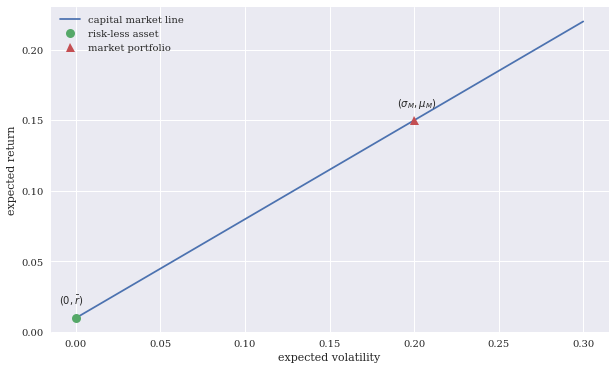

In [53]:
plt.figure(figsize=(10,6))
plt.plot((0,0.3), (0.01,0.22), label='capital market line')
plt.plot(0, 0.01, 'o', ms=9, label='risk-less asset')
plt.plot(0.2, 0.15, '^', ms=9, label='market portfolio')
plt.annotate('$(0, \\bar{r})$', (0, 0.01), (-0.01, 0.02))
plt.annotate('$(\sigma_M, \mu_M)$', (0.2, 0.15), (0.19, 0.16))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();


In [54]:
phi_M = np.array((0.8, 0.2))
mu_M = mu_phi(phi_M)
mu_M

0.10666666666666666

In [55]:
sigma_M = sigma_phi(phi_M)
sigma_M

0.39474323581566567

In [56]:
r = 0.0025

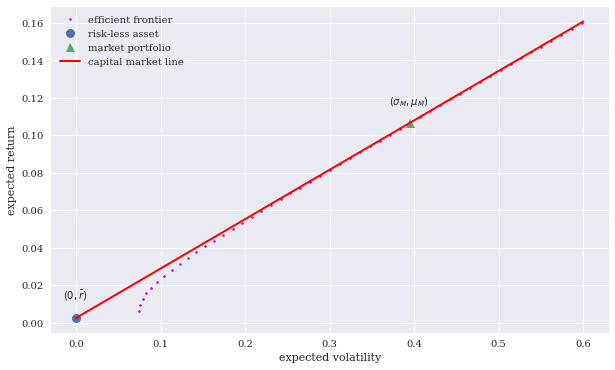

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'm.', ms=5,
label='efficient frontier')
plt.plot(0, r, 'o', ms=9, label='risk-less asset')
plt.plot(sigma_M, mu_M, '^', ms=9, label='market portfolio')
plt.plot((0, 0.6), (r, r + ((mu_M - r) / sigma_M) * 0.6),
'r', label='capital market line', lw=2.0)
plt.annotate('$(0, \\bar{r})$', (0, r), (-0.015, r + 0.01))
plt.annotate('$(\sigma_M, \mu_M)$', (sigma_M, mu_M),
(sigma_M - 0.025, mu_M + 0.01))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [58]:
def U(p):
    mu, sigma = p 
    return mu - 1 / 2 * (sigma ** 2 + mu ** 2)

In [59]:
cons = {'type': 'eq', 'fun': lambda p: p[0] - (r + (mu_M -r) / sigma_M * p[1])}

In [60]:
opt = minimize(lambda p: -U(p), (0.1, 0.3), constraints=cons)
opt

     fun: -0.034885186826739426
     jac: array([-0.93256102,  0.24608851])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.06743897, 0.2460885 ])

In [61]:
from sympy import * 
init_printing(_use_unicode=False, use_latex=False)

In [62]:
mu, sigma, b,v = symbols('mu sigma b v')
sol = solve('mu - b /2 * (sigma ** 2 + mu ** 2) -v', mu)
sol

⎡       _____________________     _____________________    ⎤
⎢      ╱    2  2                 ╱    2  2                 ⎥
⎢1 - ╲╱  - b ⋅σ  - 2⋅b⋅v + 1   ╲╱  - b ⋅σ  - 2⋅b⋅v + 1  + 1⎥
⎢────────────────────────────, ────────────────────────────⎥
⎣             b                             b              ⎦

In [63]:
u1 = sol[0].subs({'b':1,'v':0.1})
u1

       __________
      ╱        2 
1 - ╲╱  0.8 - σ  

In [64]:
u2 = sol[0].subs({'b':1,'v':0.125})
u2

       ___________
      ╱         2 
1 - ╲╱  0.75 - σ  

In [65]:
f1 = lambdify(sigma, u1)
f2 = lambdify(sigma, u2)
sigma_ = np.linspace(0.0, 0.5)
u1_ = f1(sigma_)
u2_ = f2(sigma_)

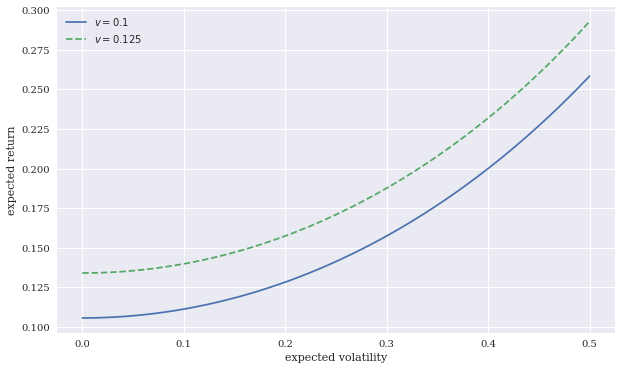

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_, u1_, label='$v=0.1$')
plt.plot(sigma_, u2_, '--', label='$v=0.125$')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [67]:
u = sol[0].subs({'b':1, 'v': -opt['fun']})
u

       ________________________
      ╱                      2 
1 - ╲╱  0.930229626346521 - σ  

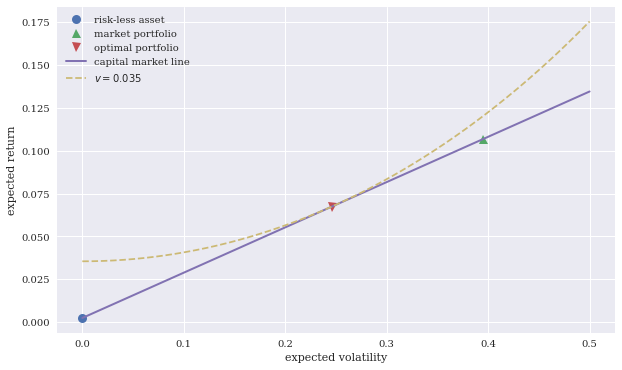

In [68]:
f = lambdify(sigma, u)
u_ = f(sigma_)
plt.figure(figsize=(10, 6))
plt.plot(0, r, 'o', ms=9, label='risk-less asset')
plt.plot(sigma_M, mu_M, '^', ms=9, label='market portfolio')
plt.plot(opt['x'][1], opt['x'][0], 'v', ms=9, label='optimal portfolio')
plt.plot((0, 0.5), (r, r + (mu_M - r) / sigma_M * 0.5),
         label='capital market line', lw=2.0)
plt.plot(sigma_, u_, '--', label='$v={}$'.format(-round(opt['fun'], 3)))
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

In [69]:
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [70]:
M0

array([10, 10])

In [71]:
V1 = np.array((12,15,7))

In [72]:
reg = np.linalg.lstsq(M1, V1, rcond=-1)[0]
reg

array([0.6141665 , 0.50030531])

In [73]:
np.dot(M1, reg)

array([12.78363525, 12.14532872,  9.57480155])

In [74]:
np.dot(M1, reg) - V1

array([ 0.78363525, -2.85467128,  2.57480155])

In [76]:
V0 = np.dot(M0, reg)
V0

11.144718094850402